In [2]:
from rdkit import Chem

In [3]:
# def dfs(graph,node,path):
#     if len(path)==len(graph)and node==path[0]:
#         print(path)
#         return 1
#     totalSolution= 0
#     if node not in path:
#         path.append(node)
#         for x in graph[node]:
#             totalSolution += dfs(graph,x, path)
#         path.pop()
    
#     return totalSolution

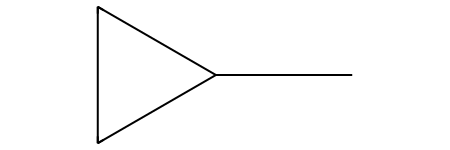

In [33]:
mol=Chem.MolFromSmiles("CC1CC1")
mol

In [34]:
from math import sqrt
total = 0
for a in mol.GetAtoms():
    d = a.GetDegree()
    total += 1/sqrt(d)
total

2.9915638315627207

In [35]:
#copy
total = 0
for a in mol.GetAtoms():
    d = a#.GetDegree()
    total += 1#/sqrt(d)
total

4

In [36]:
total = 0
for b in mol.GetBonds():
    d1=b.GetBeginAtom().GetDegree()
    d2=b.GetEndAtom().GetDegree()
    total += 1/(sqrt(d1)*sqrt(d2))
total


1.8938468501173518

In [37]:
from itertools import combinations
total=0
for middle_atom in mol.GetAtoms():
    #print(middle_atom.GetSymbol())
    for begin_atom,end_atom in combinations(middle_atom.GetNeighbors(),2):
        #print(begin_atom.GetSymbol(),middle_atom.GetSymbol(),end_atom.GetSymbol())
        total += 1 # 1/...
    #print()
total

5

In [38]:
#copy

In [39]:
from itertools import combinations
total=0
for middle_atom in mol.GetAtoms():
    #print(middle_atom.GetSymbol())
    for begin_atom,end_atom in combinations(middle_atom.GetNeighbors(),2):
        d1,d2,d3=(begin_atom.GetDegree(),middle_atom.GetDegree(),end_atom.GetDegree())
        total += 1/(sqrt(d1)*sqrt(d2)*sqrt(d3))
    #print()
total

1.6825219847121644

In [40]:
total2 = 0
total3=0
for a in mol.GetAtoms():
    for b in a.GetNeighbors():
        for c in b.GetNeighbors():
            if a.GetIdx()!=c.GetIdx(): # a!=c
                total2 += 1
            for d in c.GetNeighbors():
                if d.GetIdx() != b.GetIdx(): # d!=b
                    total3+=1
print(total2//2,total3//2)

5 10


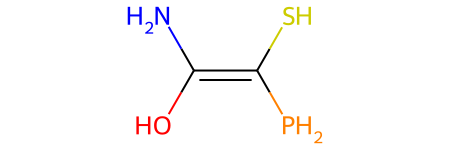

In [43]:
mol1=Chem.MolFromSmiles("OC(N)=C(P)S")
mol1

In [44]:
total3=0
total2 = 0

for a in mol.GetAtoms():
    for b in a.GetNeighbors():
        for c in b.GetNeighbors():
            if a.GetIdx()!=c.GetIdx(): # a!=c
                total2 += 1
            for d in c.GetNeighbors():
                if d.GetIdx() != b.GetIdx():# and d.GetIdx() != a.GetIdx() : # d!=b
                    total3+=1
print(total2//2,total3//2)

5 10


In [45]:
from itertools import combinations,product
total=0
for middle_bond in mol.GetBonds():
    left_middle_atom = middle_bond.GetBeginAtom()
    right_middle_atom = middle_bond.GetEndAtom()
    left_neighbors = [a for a in left_middle_atom.GetNeighbors() 
                      if a.GetIdx()!=right_middle_atom.GetIdx()]
    right_neighbors = [a for a in right_middle_atom.GetNeighbors() 
                      if a.GetIdx()!=left_middle_atom.GetIdx()]
    for left_atom,right_atom in product(left_neighbors,right_neighbors):
        total += 1 # 1/...
        
total

5

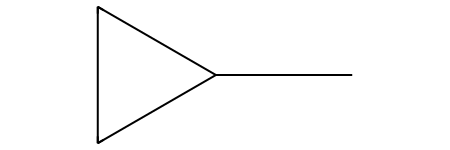

In [46]:
mol

In [51]:
def dfss(root,path=None,visited=None,parent=None,ring_atoms=None):
    if visited is None:
        visited=set()
    if path is None:
        path=[]
    if ring_atoms is None:
        ring_atoms = set()
    print(root)
    visited.add(root)
    path.append(root)
    for nbor in root.get_neighbors():
        if nbor!=parent:
            if nbor not in visited:
                dfss(nbor,path,visited,root,ring_atoms)
            else:
                if nbor in path:
                    ring_atoms.update(path[path.index(nbor):])
    path.pop()
    return ring_atoms


In [52]:
dfss(m.get_atoms()[0])

NameError: name 'm' is not defined

In [47]:
#task 6

In [49]:
def _get_number_of_paths_of_length2(self):
        # TODO: See Handout 2, exercise 6
        total2=0
        for a in self.GetAtoms():
            for b in a.GetNeighbors():
                for c in b.GetNeighbors():
                    if a.GetIdx()!=c.GetIdx(): # a!=c
                        total2 += 1
        return total2
        
        

    def _get_number_of_paths_of_length3(self):
        # TODO: See Handout 2, exercise 6
        total2=0
        for middle_bond in self.get_bonds():
            left_middle_atom = middle_bond.GetBeginAtom()
            right_middle_atom = middle_bond.GetEndAtom()
            left_neighbors = [a for a in left_middle_atom.get_neighbors(self) 
                              if a.GetIdx()!=right_middle_atom.GetIdx()]
            right_neighbors = [a for a in right_middle_atom.get_neighbors(self) 
                              if a.GetIdx()!=left_middle_atom.GetIdx()]
            for left_atom,right_atom in product(left_neighbors,right_neighbors):
                total2 += 1
        return total2
        
        
#----------------------------------------------------------------

    def get_kier_1(self):
        # TODO: See Handout 2, exercise 6
         #total = 0
         #for b in self.GetBonds():
             #d1=b.GetBeginAtom().GetDegree()
             #d2=b.GetEndAtom().GetDegree()
             #total += 1
         #total2 = 0
        total2=self.get_num_atoms()#------------------------------ todo
        for a in self.GetAtoms():
            d = a#.GetDegree()
            total2 += 1#/sqrt(d)
        #total2
        kier_1=(total2(total2-1)**2)/(total)**2
        return kier_1
#----------------------------------------------------------------
        
        

    def get_kier_2(self):
        # TODO: See Handout 2, exercise 6
#         total2=0
#         for a in self.GetAtoms():
#             for b in a.GetNeighbors():
#                 for c in b.GetNeighbors():
#                     if a.GetIdx()!=c.GetIdx(): # a!=c
#                         total2 += 1
        total2=self.get_num_atoms()
        total1=0
        for middle_atom in self.get_atoms():
            # from combinations we get the possiblity of having two...
            for begin_atom,end_atom in combinations(middle_atom.get_neighbors(),2):
                d1,d2,d3=(begin_atom.get_degree(),middle_atom.get_degree(),end_atom.get_degree())
                total1 += 1
        kier_2=(((total2//2)-1)*((total2//2)-2)**2)/(total1)**2
        return kier_2
#------------------------------------------------------------------

    def get_kier_3(self):
#         total2=0
#         for middle_bond in self.GetBonds():
#             left_middle_atom = middle_bond.GetBeginAtom()
#             right_middle_atom = middle_bond.GetEndAtom()
#             left_neighbors = [a for a in left_middle_atom.GetNeighbors() 
#                               if a.GetIdx()!=right_middle_atom.GetIdx()]
#             right_neighbors = [a for a in right_middle_atom.GetNeighbors() 
#                               if a.GetIdx()!=left_middle_atom.GetIdx()]
#             for left_atom,right_atom in product(left_neighbors,right_neighbors):
#                 total2 += 1
        total2=self.get_num_atoms()
                
        # todo for total1
        if total2/2!=0:# if its odd 
            kier_3=((total2-1)-(total2-3)**2)/()
        else:
            kier_3=((total2-3)-(total2-2)**2)/()
            

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)